In [330]:
%matplotlib inline

In [331]:
from sklearn.externals.joblib import Memory
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split
import math
import random
import numpy as np
import matplotlib.pyplot as plt

def get_data(file_path):
    data = load_svmlight_file(file_path, n_features = 123)
    return data[0], data[1].reshape(len(data[1]),1)

def split_data(X,y):
    X_train, X_validation, y_train, y_validation = train_test_split(X,y,test_size=0.3)
    return X_train, X_validation, y_train, y_validation

def SGD(X, y, w, batch_size):
    index = (1-y*X.dot(w)<0)
    y[index] = 0
    rand = random.randint(0,X.shape[0]-batch_size)
    gradient = w-(X[rand:rand+batch_size].T*y[rand:rand+batch_size]).reshape(123,1)
    return gradient

def loss_compute(X, y, w):
    epsilon_loss = 1-y*X.dot(w)
    epsilon_loss[epsilon_loss<0] = 0
    loss = 0.5*np.dot(w.T,w).sum()+epsilon_loss.sum()
    return loss/X.shape[0]

def accuracy_compute(X,y,w):
    predict_value = X*w
    predict_value[predict_value > 0] = 1
    predict_value[predict_value <= 0] = -1
    return np.count_nonzero(predict_value == y)/X.shape[0]


batch_size = 8
interation = 300
n = 0.02
loss_validation = []
accuracy_validation = []

feature_train, label_train = get_data("a9a_train.txt")
feature_test, label_test = get_data("a9a_test.txt")
w = np.ones((feature_train.shape[1],1))

for i in range(0,interation):
    gradient = SGD(feature_train, label_train, w, 1)
    D = -gradient
    w = w + n*D
    Interation.append(i)
    loss_validation.append(loss_compute(feature_test, label_test, w))
    accuracy_validation.append(accuracy_compute(feature_test, label_test, w))
    

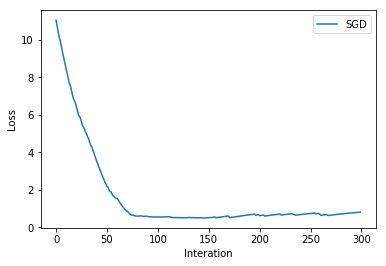

In [332]:
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(loss_validation,label = "SGD")
plt.legend(loc='upper right')

# loss_train

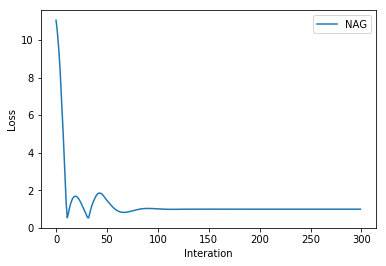

In [333]:
#NAG
loss_validation_NAG = []
accuracy_validation_NAG = []
w = np.ones((feature_train.shape[1],1))
vt = 0
r = 0.9
for i in range(0,interation):
    gradient = SGD(feature_train, label_train, w-r*vt, batch_size)
    vt = r*vt + n*gradient
    w = w - vt
    loss_validation_NAG.append(loss_compute(feature_test, label_test, w))
    accuracy_validation_NAG.append(accuracy_compute(feature_test, label_test, w))
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(loss_validation_NAG,label = "NAG")
plt.legend(loc='upper right')

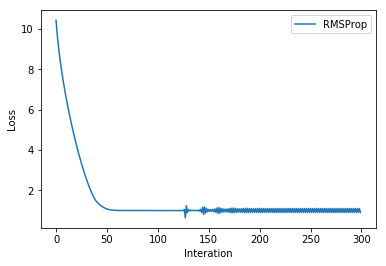

In [334]:
#RMSProp
loss_validation_RMSProp = []
accuracy_validation_RMSProp = []
w = np.ones((feature_train.shape[1],1))
r = 0.9
vt = 0
Egt = 0
e = 0.00000001 
n = 0.3
for i in range(0,interation):
    gradient = SGD(feature_train, label_train, w-r*vt, batch_size)
    Egt = r*Egt + ((1-r)*(gradient**2)).sum()
    w = w - n*gradient/math.sqrt(Egt + e)
    loss_validation_RMSProp.append(loss_compute(feature_test, label_test, w))
    accuracy_validation_RMSProp.append(accuracy_compute(feature_test, label_test, w))
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(loss_validation_RMSProp,label = "RMSProp")
plt.legend(loc='upper right')

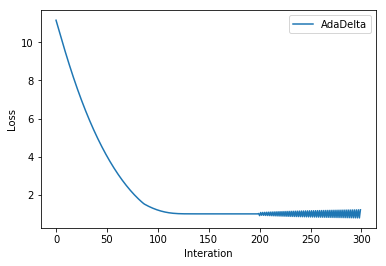

In [335]:
#AdaDelta
loss_validation_AdaDelta = []
accuracy_validation_AdaDelta = []
w = np.ones((feature_train.shape[1],1))

rho = 0.9
Egt=0  
Edt = 0  
e=0.00000001  
delta = 0  
for i in range(0,interation):
    gradient = SGD(feature_train, label_train, w, batch_size)
    Egt = rho * Egt + ((1-rho)*(gradient**2) ).sum()  
    delta = - math.sqrt(Edt + e)*gradient/math.sqrt(Egt + e)
    Edt =rho*Edt+( (1-rho)*(delta**2) ).sum()  
    w = w+n*2000 * delta
    loss_validation_AdaDelta.append(loss_compute(feature_test, label_test, w))
    accuracy_validation_AdaDelta.append(accuracy_compute(feature_test, label_test, w))
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(loss_validation_AdaDelta,label = "AdaDelta")
plt.legend(loc='upper right')

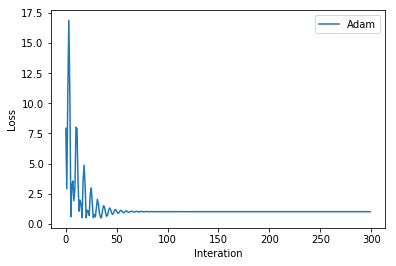

In [336]:
#Adam
loss_validation_Adam = []
accuracy_validation_Adam = []
w = np.ones((feature_train.shape[1],1))
t = 0 
m = 0  
v = 0  
b1 = 0.83  
b2 = 0.995 
for i in range(0,interation):
    gradient = SGD(feature_train, label_train, w, batch_size)
    t +=1 
    m = b1*m + ((1-b1)*gradient).sum() 
    v = b2*v + ((1-b2)*(gradient**2)).sum()  
    mt = m/(1-(b1**t))  
    vt = v/(1-(b2**t)) 
    w = w-n*mt/(math.sqrt(vt)+e)
    loss_validation_Adam.append(loss_compute(feature_test, label_test, w))
    accuracy_validation_Adam.append(accuracy_compute(feature_test, label_test, w))
plt.xlabel("Interation")
plt.ylabel("Loss")
plt.plot(loss_validation_Adam,label = "Adam")
plt.legend(loc='upper right')

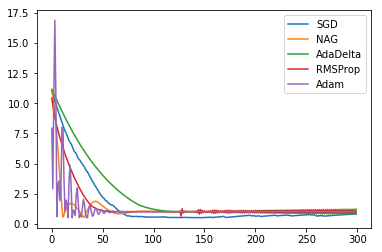

In [337]:
plt.plot(loss_validation, label="SGD")
plt.plot(loss_validation_NAG, label="NAG")
plt.plot(loss_validation_AdaDelta, label="AdaDelta")
plt.plot(loss_validation_RMSProp, label ="RMSProp")
plt.plot(loss_validation_Adam, label="Adam")
plt.legend(loc="upper right")